In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

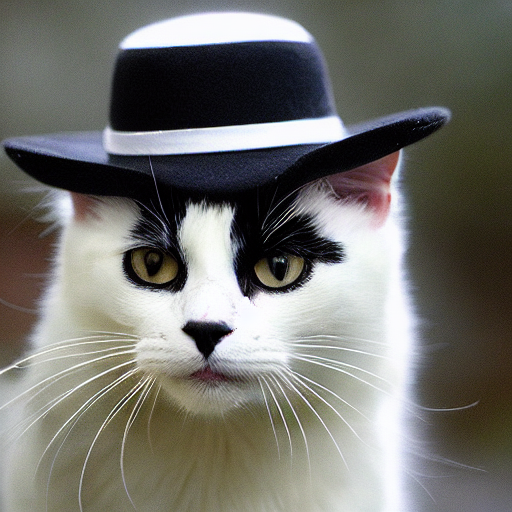

In [3]:
import torch
from diffusers import StableDiffusionPipeline
from compel import Compel

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

#pipeline.enable_sequential_cpu_offload()
generator = torch.Generator(device="cuda").manual_seed(30)

compel_proc = Compel(tokenizer=pipeline.tokenizer, text_encoder=pipeline.text_encoder)

prompt = "Black white cat with a hat, digital art"
negative_prompt = "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs, lying down"

w_prompt = compel_proc(negative_prompt)
image = pipeline(prompt=prompt, negative_prompt_embeds=w_prompt, generator=generator, num_images_per_prompt=5).images[0]

#image.save("result.png")

image